# 資料探索

## 導入程式套件

In [3]:
import requests
import numpy as np
import pandas as pd

In [4]:
#下載資料
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nbaallelo.csv"
response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [5]:
#讀取csv檔案建立dataframe
nba = pd.read_csv('nba_all_elo.csv') #read in csv file
type(nba) #check dataframe

pandas.core.frame.DataFrame

## 瞭解資料

## 初探資料
1. 資料數量(`len(df)`)
2. 資料維度(資料筆數，資料欄位)(`.shape`)
3. 初看資料表(`.head()`, `.tail()`)
4. 資料項目資料型別，數量，空值(`.info()`)
5. 數值資料項的統計(`.describe()`)
6. 文字資料項的統計(`.describe(include=object)`)

In [6]:
# 資料獲得數量
len(nba) #length of df

126314

In [7]:
# 資料維度(資料筆數、欄位數)
nba.shape #dimensionality of df

(126314, 23)

In [8]:
# 設定顯示參數
pd.set_option("display.max.columns", None)

In [9]:
pd.set_option("display.precision", 2)

In [10]:
# 初看資料前五項
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [11]:
# 初看資料後五項
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [12]:
# 查看屬性特徵 df.info()提供
# 確定為 pandas dataframe 物件
# 資料的位置索引範圍
# 屬性欄位數
# 屬性名稱
# 屬性值非空值數量
# 屬性資料型別
# 各種資料型別數目
# 記憶體使用量
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [13]:
# 數值資料統計值
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [14]:
# 非數值資料統計值
import numpy as np
nba.describe(include=object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


## 進階探索

1. 類別資料數量統計 .value_counts()
2. 日期時間屬性欄位轉換-Time Series 
3. 篩選子集合
4. 分群與彙總

### 1.類別資料數量統計，使用 .value_counts()

In [16]:
len(nba['team_id'].unique()) #104teams

104

In [18]:
# 'team_id': NBA球隊名稱簡稱
nba['team_id'].value_counts()

team_id
BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: count, Length: 104, dtype: int64

In [19]:
# 'fran_id': NBA球隊名稱
nba['fran_id'].value_counts()

fran_id
Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Water

In [21]:
nba.loc[nba['fran_id']=="Lakers", "team_id"].value_counts()

team_id
LAL    5078
MNL     946
Name: count, dtype: int64

### 2.日期時間資料轉換

In [23]:
#2
nba['date_played']=pd.to_datetime(nba["date_game"])
nba.loc[nba["team_id"]=="MNL", "date_played"].min()

Timestamp('1948-11-04 00:00:00')

In [24]:
nba.loc[nba["team_id"]=="MNL", "date_played"].max()

Timestamp('1960-03-26 00:00:00')

In [25]:
nba.loc[nba["team_id"]=="MNL", "date_played"].agg(['min','max'])

min   1948-11-04
max   1960-03-26
Name: date_played, dtype: datetime64[ns]

In [26]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
        'date_played'],
       dtype='object')]

In [27]:
nba.axes[0]

RangeIndex(start=0, stop=126314, step=1)

In [28]:
nba.axes[1]

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
       'date_played'],
      dtype='object')

In [29]:
nba.loc[1:3, ['game_id', 'team_id']]

,game_id,team_id
1,194611010TRH,NYK
2,194611020CHS,CHS
3,194611020CHS,NYK


In [30]:
nba.iloc[1:5, 1:6]

,game_id,lg_id,_iscopy,year_id,date_game
1,194611010TRH,NBA,1,1947,11/1/1946
2,194611020CHS,NBA,0,1947,11/2/1946
3,194611020CHS,NBA,1,1947,11/2/1946
4,194611020DTF,NBA,0,1947,11/2/1946


### 3.篩選資料子集合

In [32]:
#case1: 找出2010年後的比賽資料
after2010game = nba[nba['year_id']>2010]
after2010game.shape

(12658, 24)

In [33]:
#case2: 找出note不為空值的資料
game_with_notes = nba[nba['notes'].notnull()] # .notnull() = .notna()
game_with_notes.shape

(5424, 24)

In [34]:
#case3: 找出home team的名稱最後3個字母為"ers"
ers = nba[nba['fran_id'].str.endswith('ers')]
ers.shape

(27797, 24)

In [35]:
#case4: 結合多準則
nba[
    (nba["_iscopy"]==0) &
    (nba["pts"]>100) &
    (nba["opp_pts"]>100) &
    (nba['team_id']=='BLB')
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN,1949-02-26
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN,1953-01-10
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN,1953-01-14
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA,1953-03-11
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA,1954-02-22


### 4.分群與彙總

In [36]:
points = nba['pts']
type(points)

pandas.core.series.Series

In [37]:
points.sum()

12976235

In [38]:
nba.groupby("fran_id", sort=False)['pts'].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [39]:
nba[
    (nba['fran_id']=='Lakers') &
    (nba['year_id']>2010)
].groupby(['year_id', 'game_result'])["game_id"].count()

year_id  game_result
2011     L              31
         W              61
2012     L              32
         W              46
2013     L              41
         W              45
2014     L              55
         W              27
2015     L              61
         W              21
Name: game_id, dtype: int64

### 屬性欄位

In [40]:
df = nba.copy()
df['difference']=df.pts - df.opp_pts
df.shape

(126314, 25)

In [41]:
df["difference"].max()

68

In [42]:
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  object        
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

In [43]:
df.shape

(126314, 25)

In [44]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape

(126314, 21)

### 資料型別

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [45]:
df['date_game']=pd.to_datetime(df['date_game'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [46]:
df['game_location'].nunique()

3

In [47]:
df["game_location"].value_counts()

game_location
H    63138
A    63138
N       38
Name: count, dtype: int64

In [48]:
df["game_location"]=pd.Categorical(df['game_location'])
df["game_location"].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

game_location的資料型別已經改成Categroy，注意型別改變前後的資料記憶體大小改變

### 清理資料
- 遺漏值
- 錯誤值
- 不一致值

In [49]:
#missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [50]:
rows_without_missing_data = df.dropna()
rows_without_missing_data.shape

(5424, 21)

In [51]:
rows_without_missing_columns = df.dropna(axis=1)
rows_without_missing_columns.shape

(126314, 20)

In [53]:
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
    value = "no notes at all",
    inplace = True
)
data_with_default_notes['notes'].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

### invalid values

- 比遺漏值更嚴重
- 使用 .info() 檢查範圍

In [55]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast,date_played
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50,1988-04-09 00:53:18.429311104
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02,1946-11-01 00:00:00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33,1974-11-08 00:00:00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50,1990-02-06 00:00:00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67,2003-03-19 00:00:00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98,2015-06-16 00:00:00
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22,NaN


In [57]:
nba[nba["pts"]==0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR,1972-10-26


### 檢查資料一致姓


In [59]:
nba[
    (nba["pts"]>nba["opp_pts"]) &
    (nba["game_result"] != 'W')
].empty

True

In [60]:
nba[
    (nba["pts"]<nba["opp_pts"]) &
    (nba["game_result"] != 'L')
].empty

True

### 整合資料

In [84]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)

city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})

city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})

print(city_data)

           revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN


In [85]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"]
)
print(further_city_data)

           revenue  employee_count
New York      7000               2
Barcelona     3400               2


In [86]:
# combine two dataframe by rows
all_city_data = pd.concat([city_data, further_city_data], sort=False)
display(all_city_data)

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [87]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
display(city_countries)

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [88]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [89]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


In [90]:
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
}, index=["Holland", "Japan", "Canada"])

display(countries)

,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [91]:
# use .merge() to implement a join operation similar to the one from SQL
pd.merge(
    cities, 
    countries, 
    left_on="country", 
    right_index=True
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


In [92]:
pd.merge(
    cities,
    countries,
    left_on="country",
    right_index=True,
    how='left'
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


In [93]:
%matplotlib inline

<Axes: xlabel='year_id'>

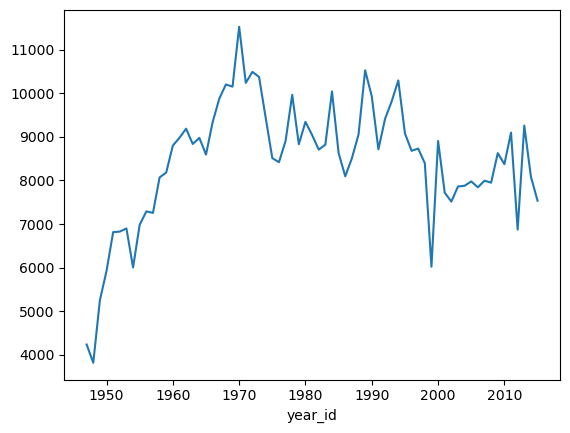

In [94]:
df_nba[df_nba['fran_id']=='Knicks'].groupby("year_id")['pts'].sum().plot()

<Axes: ylabel='fran_id'>

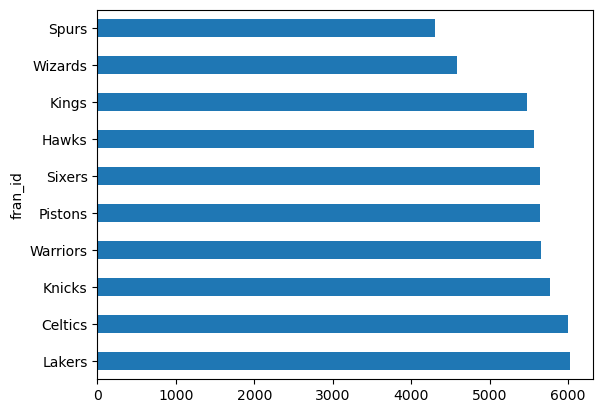

In [100]:
df_nba["fran_id"].value_counts().head(10).plot(kind='barh')

In [1]:
sns.barplot(x='Sex', y='Income', data=df)

NameError: name 'sns' is not defined